# Introduction

dataset of metadata on movies released on or before July 2017

In [51]:
import pandas as pd
import numpy as np
from ast import literal_eval
import ast

In [52]:
# load datasets
movie_data = pd.read_csv("tmdb_5000_movies.csv")
credits_data = pd.read_csv("tmdb_5000_credits.csv")

## Preview of the datasets

### movie dataset

In [53]:
# display first few rows of the movie dataset
movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [54]:
movie_data.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [55]:
print("The movie dataset has {} rows and {} columns.".format(len(movie_data), len(movie_data.columns)))

The movie dataset has 4803 rows and 20 columns.


### credits dataset

In [56]:
credits_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [57]:
print("The credits dataset has {} rows and {} columns.".format(len(credits_data), len(credits_data.columns)))

The credits dataset has 4803 rows and 4 columns.


## Merge movie and credits dataset

In [58]:
credits_data.drop('title', axis=1, inplace=True)

In [59]:
# join movie and credits data
data = pd.merge(movie_data, credits_data, left_on='id', right_on='movie_id')

In [60]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [61]:
data.shape

(4803, 23)

# Data Cleaning

## Unnecessary columns

Dropping columns that provide no useful information to the analysis

In [62]:
data = data.drop(columns=['homepage', 'original_title','original_language', 'id', 'movie_id'])

## Data types

In [63]:
# list of column names to change to numeric
#cols = ['id', 'budget']
#for col in cols:
#    data[col] = pd.to_numeric(data[col], errors='coerce', downcast='integer')

#data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

In [64]:
data.dtypes

budget                    int64
genres                   object
keywords                 object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

- convert release date column to datetime

In [65]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

## Lists and Dictionaries

some columns have values stored in lists or dictionaries. I will modify theses columns to contain only information needed for the analysis.

In [66]:

cols = ['genres', 'spoken_languages', 'production_countries', 'production_companies', 'keywords', 'cast', 'crew']
for col in cols:
    data[col] = (
    data[col]
    .fillna("[]")
    .apply(ast.literal_eval)
    .apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    )

In [67]:
data.head()

,budget,genres,keywords,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter..."


## Null values

In [68]:
print("{} out of {} in the revenue column is 0.".format(len(data[data['revenue']==0]),
                                                        len(data['revenue'])))

1427 out of 4803 in the revenue column is 0.


The value of 0 is a placeholder for unreported revenue, thus I will change the 0's in the revenue column to NA

In [69]:
data['revenue'] = data['revenue'].replace(0, np.nan)

## New features

### ROI

Add a new column ROI representing the return of investment. Calculated by   
$ROI = \frac{(revenue - cost)}{cost}$

In [70]:
data['ROI'] = (data['revenue'] - data['budget'])/data['budget']

### release year and month

In [71]:
data['year'] = pd.DatetimeIndex(data['release_date']).year
data['month'] = pd.DatetimeIndex(data['release_date']).strftime("%b")

In [72]:
data.head()

,budget,genres,keywords,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,...,status,tagline,title,vote_average,vote_count,cast,crew,ROI,year,month
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",10.763566,2009.0,Dec
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,9.610000e+08,169.0,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",2.203333,2007.0,May
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,8.806746e+08,148.0,...,Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",2.594590,2015.0,Oct
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1.084939e+09,165.0,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",3.339756,2012.0,Jul
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,2.841391e+08,132.0,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",0.092843,2012.0,Mar


# Data exploration

In [73]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Overview

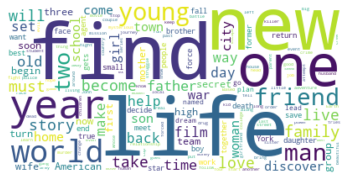

In [76]:
stopwords = set(STOPWORDS)
data['overview'] = data['overview'].astype('str')
overview_text = " ".join(data['overview'])
keywords_cloud = WordCloud(stopwords=stopwords,
                           collocations=False,
                           background_color="white").generate(overview_text)
plt.imshow(keywords_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [78]:
import seaborn as sns

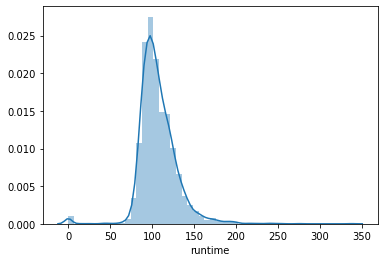

In [79]:
sns.distplot(data.runtime)

In [ ]:
# production companies

## Top ten movies

Sort movie data by revenue in descending order and display the top 10 movies

In [12]:
top_revenue = data.sort_values(by='revenue', ascending=False)
top_revenue.head(10)

,budget,genres,id,keywords,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[Drama, Romance, Thriller]",597,"[shipwreck, iceberg, ship, panic, titanic, oce...","84 years later, a 101-year-old woman named Ros...",100.025899,"[Paramount Pictures, Twentieth Century Fox Fil...",[United States of America],1997-11-18,1845034188,194.0,"[English, Français, Deutsch, svenska, Italiano...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[Science Fiction, Action, Adventure]",24428,"[new york, shield, marvel comic, superhero, ba...",When an unexpected enemy emerges and threatens...,144.448633,"[Paramount Pictures, Marvel Studios]",[United States of America],2012-04-25,1519557910,143.0,[English],Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[Action, Adventure, Science Fiction, Thriller]",135397,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,418.708552,"[Universal Studios, Amblin Entertainment, Lege...",[United States of America],2015-06-09,1513528810,124.0,[English],Released,The park is open.,Jurassic World,6.5,8662
44,190000000,[Action],168259,"[car race, speed, revenge, suspense, car, race...",Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[Universal Pictures, Original Film, Fuji Telev...","[Japan, United States of America]",2015-04-01,1506249360,137.0,[English],Released,Vengeance Hits Home,Furious 7,7.3,4176
7,280000000,"[Action, Adventure, Science Fiction]",99861,"[marvel comic, sequel, superhero, based on com...",When Tony Stark tries to jumpstart a dormant p...,134.279229,"[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America],2015-04-22,1405403694,141.0,[English],Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
124,150000000,"[Animation, Adventure, Family]",109445,"[queen, musical, princess, betrayal, snowman, ...",Young princess Anna of Arendelle dreams about ...,165.125366,"[Walt Disney Pictures, Walt Disney Animation S...",[United States of America],2013-11-27,1274219009,102.0,[English],Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295
31,200000000,"[Action, Adventure, Science Fiction]",68721,"[terrorist, war on terror, tennessee, malibu, ...",When Tony Stark's world is torn apart by a for...,77.682080,[Marvel Studios],"[China, United States of America]",2013-04-18,1215439994,130.0,[English],Released,Unleash the power behind the armor.,Iron Man 3,6.8,8806
546,74000000,"[Family, Animation, Adventure, Comedy]",211672,"[assistant, aftercreditsstinger, duringcredits...","Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[Universal Pictures, Illumination Entertainment]",[United States of America],2015-06-17,1156730962,91.0,[English],Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571
26,250000000,"[Adventure, Action, Science Fiction]",271110,"[civil war, war, marvel comic, sequel, superhe...","Following the events of Age of Ultron, the col...",198.372395,"[Studio Babelsberg, Marvel Studios, Walt Disne...",[United States of America],2016-04-27,1153304495,147.0,"[Română, English, Deutsch, Pусский]",Released,Divided We Fall,Captain America: Civil War,7.1,7241


In [41]:
genre_data = ( data.genres.apply(pd.Series)
              .merge(data, left_index=True, right_index=True)
              .drop(['genres'], axis=1)
              .melt(id_vars=['year', 'revenue'], value_name='genre')
              .drop('variable', axis=1)
              .dropna()
             )

genre_data.head()

,year,revenue,genre
0,2009.0,2.787965e+09,Action
1,2007.0,9.610000e+08,Adventure
2,2015.0,8.806746e+08,Action
3,2012.0,1.084939e+09,Action
4,2012.0,2.841391e+08,Action


In [42]:
genre_data['genre'] = genre_data['genre'].astype('str')

In [43]:
genre_data.shape

(69384, 3)

In [44]:
group = genre_data.groupby(['genre', 'year']).mean()

In [45]:
genre_yearly = group.reset_index()
genre_yearly.head(10)

,genre,year,revenue
0,"""88 Minutes"" focuses on a college professor (P...",2007.0,16930884.0
1,"""All the world likes an outlaw. For some damn ...",1980.0,15795189.0
2,"""Frida"" chronicles the life Frida Kahlo shared...",2002.0,56298474.0
3,"""Patton"" tells the tale of General George S. P...",1970.0,89800000.0
4,"""Selma,"" as in Alabama, the place where segreg...",2014.0,66787908.0
5,"""Stonewall"" is a drama about a young man in Ne...",2015.0,187674.0
6,"""The Hours"" is the story of three women search...",2002.0,41597830.0
7,"""The Passion of the Christ"" is a film about th...",2004.0,611899420.0
8,"""The Work and The Glory: American Zion"" sets t...",2005.0,2025032.0
9,#LiveBoldly,2016.0,207945075.0


In [ ]:
sns.relplot(x='year',
           y='revenue',
           kind='line',
           data=genre_data,
           hue='genre')